In [32]:
import pandas as pd
df = pd.read_csv('titanic3.csv')
df['family']=df.sibsp+df.parch
df.columns
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
family          0
dtype: int64

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
# plt.figure(figsize=(8,6))
# sns.heatmap(df.corr(),annot=True)
# plt.title('Heatmap of the Dataset', fontsize=20)
df[['survived','pclass',  'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest', 'family']].corr()

,survived,pclass,age,sibsp,parch,fare,body,family
survived,1.000000,-0.312469,-0.055512,-0.027825,0.082660,0.244265,NaN,0.026876
pclass,-0.312469,1.000000,-0.408106,0.060832,0.018322,-0.558629,-0.034642,0.050027
age,-0.055512,-0.408106,1.000000,-0.243699,-0.150917,0.178740,0.058809,-0.240229
sibsp,-0.027825,0.060832,-0.243699,1.000000,0.373587,0.160238,-0.099961,0.861952
parch,0.082660,0.018322,-0.150917,0.373587,1.000000,0.221539,0.051099,0.792296
fare,0.244265,-0.558629,0.178740,0.160238,0.221539,1.000000,-0.043110,0.226492
body,NaN,-0.034642,0.058809,-0.099961,0.051099,-0.043110,1.000000,-0.033628
family,0.026876,0.050027,-0.240229,0.861952,0.792296,0.226492,-0.033628,1.000000


Text(0.5, 1.0, 'Heatmap of the Dataset')

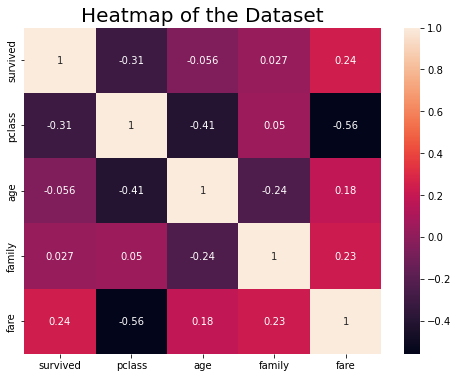

In [34]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['survived','pclass','sex','age','family','fare']].corr(),annot=True)
plt.title('Heatmap of the Dataset', fontsize=20)

In [35]:
import pandas as pd
# df = pd.read_csv('titanic3.csv')
# df['family']=df.sibsp+df.parch

def sex(x):
    if x == 'female':
        return 1
    else:
        return 0
df.sex=df.sex.apply(sex)

def age(x):
    if x<10:
        return 1
    elif x<20:
        return 2
    elif x<40:
        return 3
    elif x<50:
        return 4
    elif x>=50:
        return 5
    

df.age=df.age.apply(age)
df=df.fillna(df.age.mean())

df


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,family
0,1,1,"Allen, Miss. Elisabeth Walton",1,3.000000,0,0,24160,211.3375,B5,S,2,3.045889,"St Louis, MO",0
1,1,1,"Allison, Master. Hudson Trevor",0,1.000000,1,2,113781,151.5500,C22 C26,S,11,3.045889,"Montreal, PQ / Chesterville, ON",3
2,1,0,"Allison, Miss. Helen Loraine",1,1.000000,1,2,113781,151.5500,C22 C26,S,3.045889,3.045889,"Montreal, PQ / Chesterville, ON",3
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,3.000000,1,2,113781,151.5500,C22 C26,S,3.045889,135.000000,"Montreal, PQ / Chesterville, ON",3
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,3.000000,1,2,113781,151.5500,C22 C26,S,3.045889,3.045889,"Montreal, PQ / Chesterville, ON",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",1,2.000000,1,0,2665,14.4542,3.045889,C,3.045889,328.000000,3.045889,1
1305,3,0,"Zabour, Miss. Thamine",1,3.045889,1,0,2665,14.4542,3.045889,C,3.045889,3.045889,3.045889,1
1306,3,0,"Zakarian, Mr. Mapriededer",0,3.000000,0,0,2656,7.2250,3.045889,C,3.045889,304.000000,3.045889,0
1307,3,0,"Zakarian, Mr. Ortin",0,3.000000,0,0,2670,7.2250,3.045889,C,3.045889,3.045889,3.045889,0


In [2]:
from sklearn.model_selection import train_test_split
y_df=df.survived 
X_df=df[['pclass','sex','age','family','fare']]

X_train,X_test,y_train,y_test=train_test_split(X_df,y_df,test_size=0.2,random_state=10)

print(X_train.shape)
print(X_test.shape)



(1047, 5)
(262, 5)


In [4]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


rf_model=RandomForestClassifier(max_depth=6, n_estimators=1000,random_state=1)
rf_model.fit(X=X_train,y=y_train)
rf_pred=rf_model.predict(X_test)
accuracy_rf=accuracy_score(y_test, rf_pred)

lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)
lr_pred=lr_model.predict(X_test)
accuracy_lr=accuracy_score(y_test,lr_pred).round(2)

accuracy_rf
round(accuracy_lr,2)

0.77

In [292]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,MinMaxScaler,StandardScaler


estimators = [('scaler', MinMaxScaler()),
             ('clf', RandomForestClassifier(random_state=1))]

pipe = Pipeline(estimators)

In [293]:
from sklearn.model_selection import GridSearchCV

params = [{
    'clf__max_depth': [6, 8, 10, 12,],
    'clf__n_estimators': [50, 100, 500,1000]
}]

gridsearch = GridSearchCV(
    estimator=pipe, param_grid=params, return_train_score=True, cv=5, verbose=2)

gridsearch.fit(X_df, y_df)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .............clf__max_depth=6, clf__n_estimators=50; total time=   0.0s
[CV] END .............clf__max_depth=6, clf__n_estimators=50; total time=   0.0s
[CV] END .............clf__max_depth=6, clf__n_estimators=50; total time=   0.0s
[CV] END .............clf__max_depth=6, clf__n_estimators=50; total time=   0.0s
[CV] END .............clf__max_depth=6, clf__n_estimators=50; total time=   0.0s
[CV] END ............clf__max_depth=6, clf__n_estimators=100; total time=   0.0s
[CV] END ............clf__max_depth=6, clf__n_estimators=100; total time=   0.0s
[CV] END ............clf__max_depth=6, clf__n_estimators=100; total time=   0.0s
[CV] END ............clf__max_depth=6, clf__n_estimators=100; total time=   0.0s
[CV] END ............clf__max_depth=6, clf__n_estimators=100; total time=   0.0s
[CV] END ............clf__max_depth=6, clf__n_estimators=500; total time=   0.4s
[CV] END ............clf__max_depth=6, clf__n_es

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('clf',
                                        RandomForestClassifier(random_state=1))]),
             param_grid=[{'clf__max_depth': [6, 8, 10, 12],
                          'clf__n_estimators': [50, 100, 500, 1000]}],
             return_train_score=True, verbose=2)

In [294]:
pred = gridsearch.best_estimator_.predict(X_test)
print(accuracy_score(y_test, pred))

0.851145038167939
